<a href="https://colab.research.google.com/github/harnalashok/exercises/blob/main/notebook188f2af15e-Anjali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Anjali
# Commented: Ashok K Harnal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# Define two general functions to annotate plots with percentages:
# See StackOverflow: https://stackoverflow.com/a/62053049
# To be used whereever countplot() is being used or catplot()

def with_hue(plot, feature, Number_of_levels, hue_levels):
    """
    Number_of_levels: No of levels in main feature
    hue_levels: No of levels in hue feature
    """
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_levels):
        total = feature.value_counts().values[i]
        for j in range(hue_levels):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_levels + i)]/total)
            x = patch[(j*Number_of_levels + i)].get_x() + patch[(j*Number_of_levels + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_levels + i)].get_y() + patch[(j*Number_of_levels + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


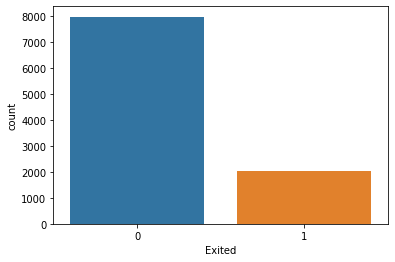

In [3]:
sns.countplot(df['Exited'],label="Count");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


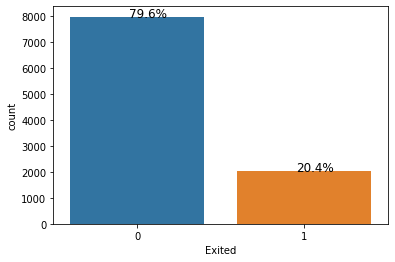

In [5]:
###$ More informative

ax =sns.countplot(df['Exited'],label="Count");
without_hue(ax,df.Exited)

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
ge=pd.crosstab(df.Exited,df.Gender)
ge

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


<AxesSubplot:xlabel='Exited', ylabel='count'>

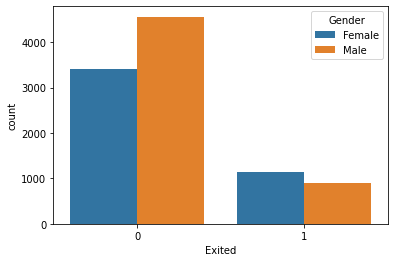

In [ ]:
sns.countplot(x='Exited', hue='Gender', data=df)

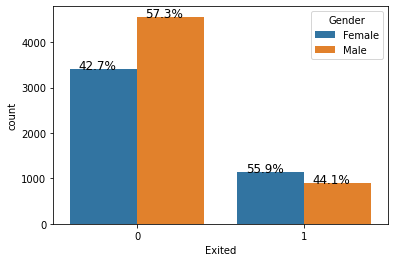

In [7]:
ax = sns.countplot(x='Exited', hue='Gender', data=df)
with_hue(ax,df.Exited, 2,2)

<AxesSubplot:xlabel='Exited', ylabel='count'>

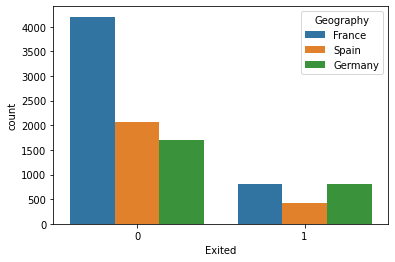

In [ ]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [8]:
###$ Helps in comparing two adjacent bars
def percent_graph(grby,hue, data):
  so = data.groupby(grby)[hue].value_counts(normalize = True)
  so.name = '%count'
  t = so.reset_index()
  sns.set_theme(style="whitegrid")
  sns.barplot(x = grby, y = '%count', hue= hue, data= t)

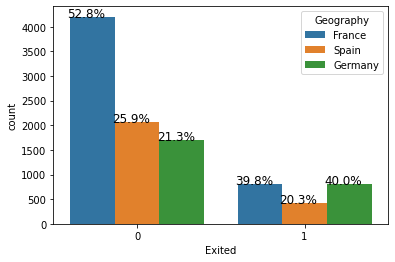

In [9]:
ax = sns.countplot(x='Exited', hue='Geography', data=df)
with_hue(ax,df.Exited, 2,3)

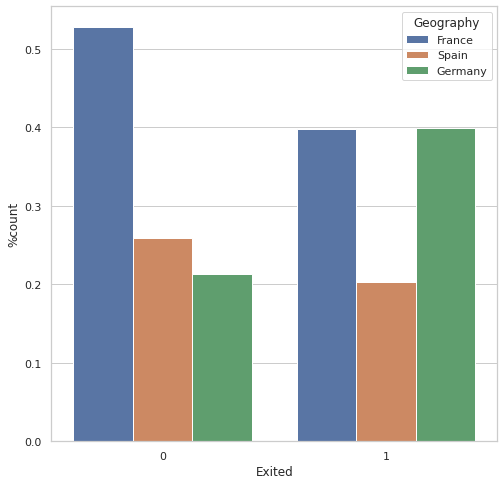

In [16]:
###$ Another moreinformative graph
plt.figure(figsize = (8,8))
percent_graph('Exited', 'Geography', df)

In [ ]:
df1=pd.crosstab( df['Exited'], df['Geography'])
df1

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


Text(0.5, 1.0, 'Churn_Rate in Location')

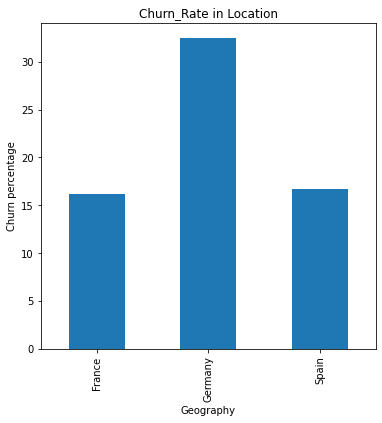

In [ ]:
plt.figure(figsize=(6,6))
(df1.loc[1] * 100.0 / df1.sum()).plot(x=df1.index, y=df1.values, kind='bar')
plt.ylabel('Churn percentage')
plt.title('Churn_Rate in Location')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


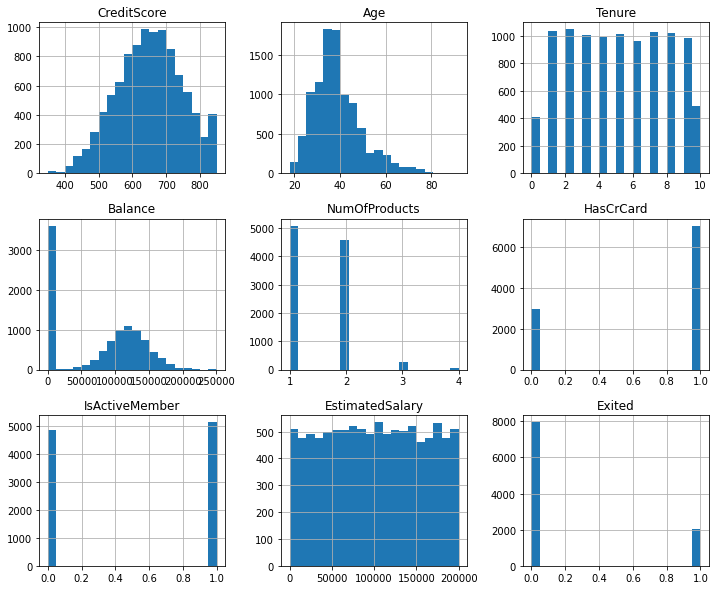

In [ ]:
###$ Please select only those columns for histogram which are continuous.
##  For example, do not select HasCrCard, Exited etc

df.hist(figsize=(12,10),bins=20)
plt.show()

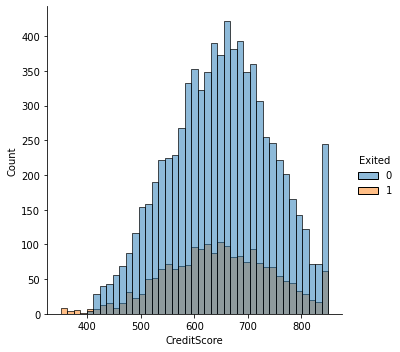

In [ ]:
sns.displot(x='CreditScore', hue='Exited', data=df)

<AxesSubplot:xlabel='Credit_Score', ylabel='Exited'>

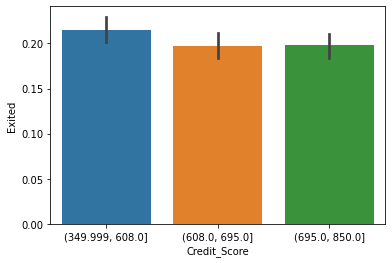

In [ ]:
# Divide Credit_Score into 3 bins
df['Credit_Score'] = pd.qcut(df['CreditScore'], 3)
  
# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Credit_Score', y ='Exited', 
data = df)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(608.0, 695.0]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(349.999, 608.0]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(349.999, 608.0]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(695.0, 850.0]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(695.0, 850.0]"


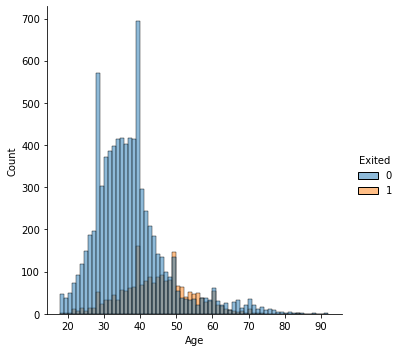

In [ ]:
sns.displot(x='Age', hue='Exited', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

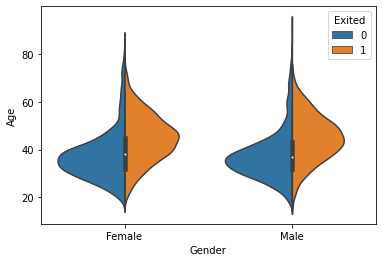

In [ ]:
sns.violinplot(x ="Gender", y ="Age", hue ="Exited", 
data = df, split = True)

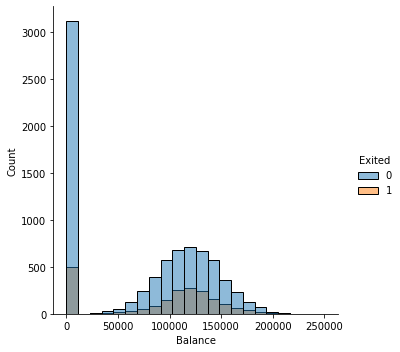

In [ ]:
sns.displot(x='Balance', hue='Exited', data=df)

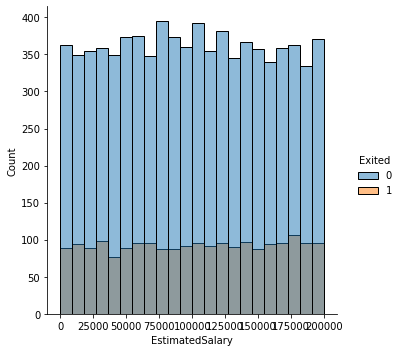

In [ ]:
sns.displot(x='EstimatedSalary', hue='Exited', data=df)

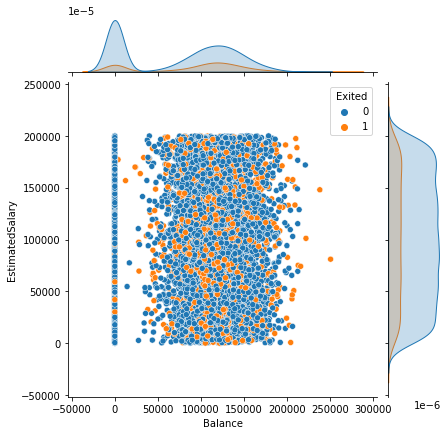

In [ ]:
sns.jointplot(x ="Balance", y ="EstimatedSalary", hue ="Exited", data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

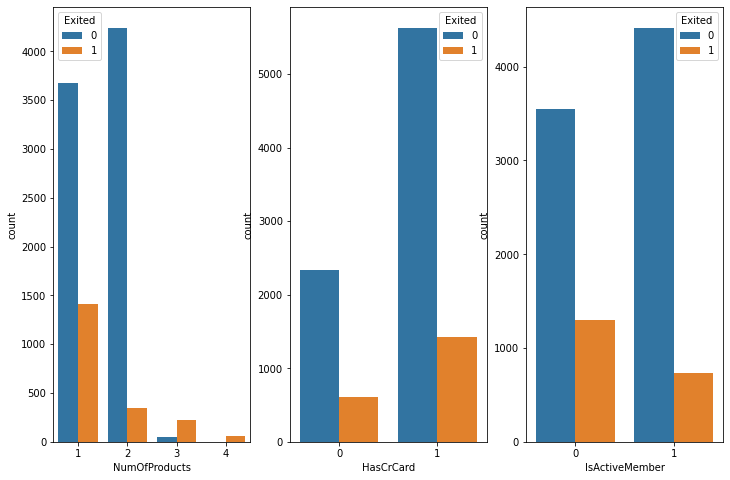

In [ ]:
_, ax = plt.subplots(1,3, figsize = (12,8))

sns.countplot(x = "NumOfProducts", hue ='Exited', data = df, ax = ax[0])
sns.countplot(x = "HasCrCard", hue='Exited', data = df, ax = ax[1])
sns.countplot(x = 'IsActiveMember' , hue = 'Exited', data = df,  ax = ax[2])

In [ ]:
df2=pd.crosstab( df['Exited'], df['HasCrCard'])
df2

HasCrCard,0,1
Exited,,
0,2332,5631
1,613,1424


Text(0.5, 1.0, 'Churn_Rate vs hascr')

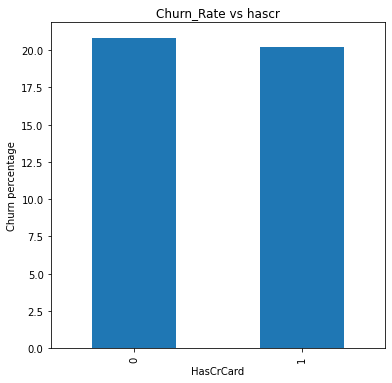

In [ ]:
plt.figure(figsize=(6,6))
(df2.loc[1] * 100.0 / df2.sum()).plot(x=df2.index, y=df2.values, kind='bar')
plt.ylabel('Churn percentage')
plt.title('Churn_Rate vs hascr')

In [ ]:
df3=pd.crosstab( df['Exited'], df['IsActiveMember'])
df3

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


Text(0.5, 1.0, 'Churn_Rate vs active')

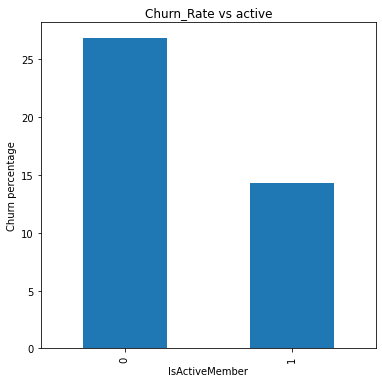

In [ ]:
plt.figure(figsize=(6,6))
(df3.loc[1] * 100.0 / df3.sum()).plot(x=df3.index, y=df3.values, kind='bar')
plt.ylabel('Churn percentage')
plt.title('Churn_Rate vs active')

In [ ]:
df[["NumOfProducts","Exited"]].groupby(["NumOfProducts"],as_index=False).mean()

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


In [ ]:
df4=pd.crosstab( df['Exited'], df['Tenure'])
df4

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389
1,95,232,201,213,203,209,196,177,197,213,101


In [17]:
EDA
1. As Customer Id, Row_no and Surname will have no impact on our data set or will not be helpul in providing any insights.Hence these colomn can be dropped.
2.Churned out Customer are 20% of our dataset as compared to the retained customer which is almost 80% of the dataset.
3.Compartively female likely to exit the bank. Further we can explore it with the age group 
4.People in the age group 35 to 50 likely to exit the bank.
5.Churn rate is less in both male and female as the age increases but quite high in the age group 40-45 in both male and female
6.There was no direct relationship in the estimated Salary of the customer with the customer data set but further can be explored with the other variables like Balance
7.Customer with Estimated Salary between 50000-100000 and Balance 100000-150000 likely to churn out of the bank.
8.Customer who has credit card and active member are less likely to churn out of the bank.
9.Customer with two number of products are likely to exit the bank.
10. On the basis of the geography, Customers from germany likely to leave bank.
11. Customers with credit score less than 600 have high tendency to churn out of the bank.
12. If the Tenure is 3yrs or less than 3 , churn rate is higher

SyntaxError: ignored